# Análise de suicídios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Leitura dos dados

In [2]:
df = pd.read_csv('master.csv')

Vamos dar uma olhada nos dados:

In [3]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
14502,Kyrgyzstan,1991,male,5-14 years,16,523400,3.06,Kyrgyzstan1991,NaN,"2,570,833,333",677,Millenials
677,Argentina,1992,female,75+ years,46,678000,6.78,Argentina1992,NaN,"228,788,617,202",7615,G.I. Generation
24228,Suriname,2003,male,15-24 years,7,43597,16.06,Suriname2003,NaN,"1,271,196,078",2916,Millenials
26547,United Kingdom,1990,female,5-14 years,0,3445865,0.00,United Kingdom1990,0.773,"1,093,169,389,205",20411,Generation X
7739,Ecuador,1988,female,55-74 years,6,348200,1.72,Ecuador1988,NaN,"13,051,886,552",1519,G.I. Generation


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


O dataset tem dados de suicídios de 1985 até 2016.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Existem dados nulos?

In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Entendendo os dados

O campo country-year apresenta o nome do país e o ano do registro. Desta forma, é uma campo redundante e será descartado. Também devido a maioria dos dados do campo 'HDI for year', será descartado. 

In [7]:
df.drop(['country-year', 'HDI for year'], inplace=True, axis = 1)

Vamos renomear algumas colunas simplesmente para ficar mais fácil de acessá-las.

In [8]:
df = df.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

Apenas para deixar claro, GDP é o PIB do país em questão. No caso, o campo 'gdp_for_year' está como uma string, então vamos converter isto para num número.

In [9]:
for i, x in enumerate(df['gdp_for_year']):
    df['gdp_for_year'][i] = x.replace(',', '')
    
df['gdp_for_year'] = df['gdp_for_year'].astype('int64')

/home/luis/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Descrição dos dados

Cada dado no conjunto de dados representa um ano, de um país, uma determinada faixa de idade, e um sexo. Por exemplo, no país Brasil no ano de 1985, com mais de 75 anos, suicidaram 129 homens.

O conjunto de dados apresenta 10 atributos. Sendo estes:

- País: país do dados do registro;
- Ano: ano dos dados do registro;
- Sexo: Sexo (homem ou mulher);
- Idade: Faixa de idade dos suicidas, idades divididas em seis faixas;
- Suicides_no: quantidade de suicidas;
- População: população deste sexo, nesta faixa de idade, neste país e neste ano;
- Suicides/100k pop: Razão entre a quantidade de suicidas e a população / 100k;
- GDP_for_year: PIP do país no ano quem questão;
- GDP_per_capita: razão entre o PIP do país e sua população;
- Generation: Geração dos suicidas em questão, sendo possíveis 6 diferentes categorias.

Possíveis faixas de idade e gerações são:

In [10]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [11]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

## Adicionando algumas coisas

Como o IDH foi descartado e é muito interessante avaliar se o desenvolvimento do país tem influência na taxa de suicidios, separei uma lista de países de primeiro e segundo mundo a partir dos dados do site:

http://worldpopulationreview.com

Depois, categorizei cada país do conjunto de dados em primeiro, segundo e terceiro mundo.

In [12]:
Frist_world = ['United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 
              'Sweden', 'Austria', 'Switzerland', 'Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland']

Second_world = ['Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina', 'Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia']

In [13]:
country_world = []
for i in range(len(df)):
    
    if df['country'][i] in Frist_world:
        country_world.append(1)
    elif df['country'][i] in Second_world:
        country_world.append(2)
    else:
        country_world.append(3)

df['country_world'] = country_world

# Análise exploratória

Vou analisar o impacto de alguns atributos de forma isolada na quantidade de suicidios. Começemos pelo ano.

#### Ano

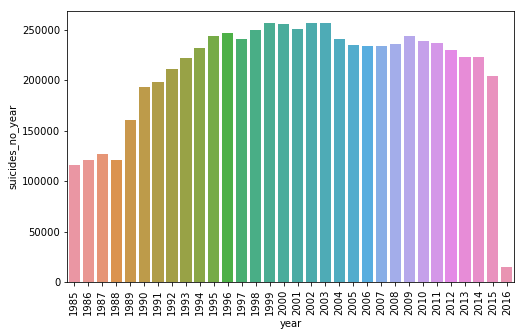

In [62]:
suicides_no_year = []

for y in df['year'].unique():
    suicides_no_year.append(sum(df[df['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

#### Idade

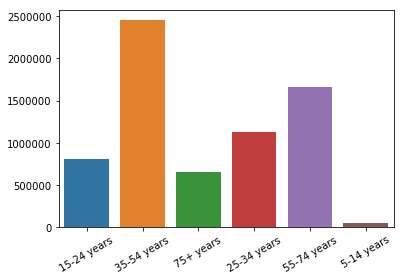

In [67]:
suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

#### Sexo

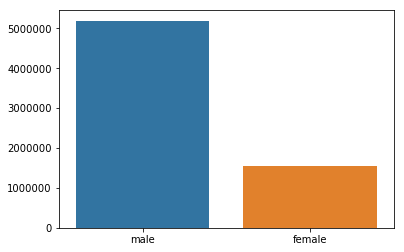

In [68]:
suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df[df['sex'] == s]['suicides_no']))

sns.barplot(x = df['sex'].unique(), y = suicides_no_sex)

#### País

Paises com maior população devem ter mais suicidios.

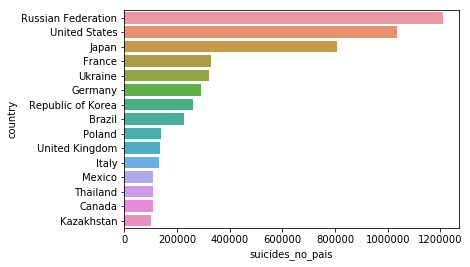

In [53]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides_no']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

Ao usarmos a quantidade de suicidios por 100k habitantes, retiramos o viés de países superpopulosos.

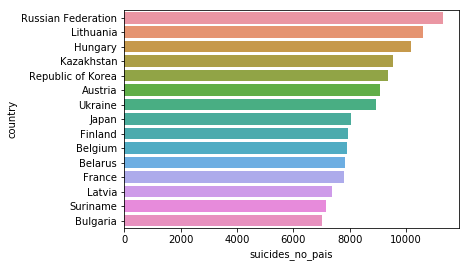

In [54]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

#### Geração

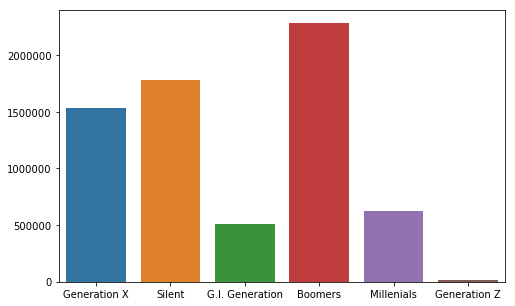

In [75]:
suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df[df['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = df['generation'].unique(), y = suicides_no_gen)

#### Country world

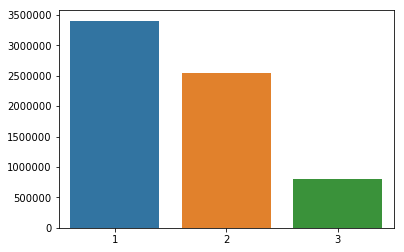

In [77]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides_no']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

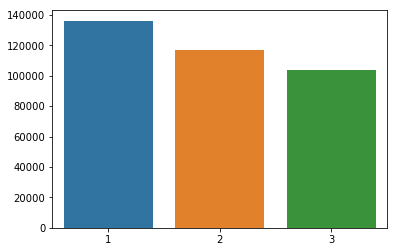

In [78]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides/100k pop']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

#### PIB do ano

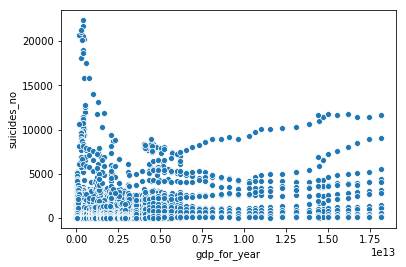

In [84]:
sns.scatterplot(x = 'gdp_for_year', y = 'suicides_no', data = df)

#### PIB por capita

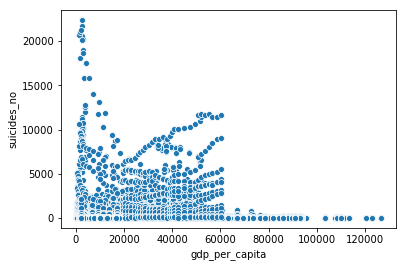

In [85]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = df)

### Correlação dos atributos

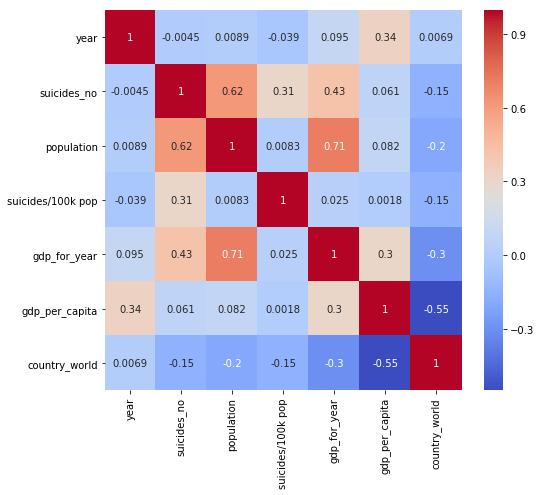

In [82]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

## Dados do Brasil

Como sou brasileiro, tenho um interesse particular no indice do suicidos do Brasil. Entãou vou tentar dar uma analisada nos índices especificos deste país.

In [90]:
df_brasil = df[df['country'] == 'Brazil']

In [91]:
df_brasil.drop(['country', 'country_world'], axis = 1, inplace = True)

/home/luis/anaconda3/envs/dl/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
